#### Arbol de Decisión - Regresión - Consumo de Gasolina

#### Paso 1: Montaje de Librerias

In [1]:
### Librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Arbol de decisión
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

##Librerías métricas
from sklearn import metrics

##Evitar warnings
import warnings
warnings.filterwarnings('ignore')

##Modulo matemáticos
from scipy import stats

#### Incoporar data 

In [2]:
gasolina = pd.read_csv("./Datasets/petrol_consumption.csv")

gasolina.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [5]:
### Summary
pd.options.display.float_format = '{:.4f}'.format
dataSumma = gasolina.describe().T
dataSumma

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0000,7.6683,0.9508,5.0000,7.0000,7.5000,8.1250,10.0000
Average_income,48.0000,4241.8333,573.6238,3063.0000,3739.0000,4298.0000,4578.7500,5342.0000
Paved_Highways,48.0000,5565.4167,3491.5072,431.0000,3110.2500,4735.5000,7156.0000,17782.0000
Population_Driver_licence(%),48.0000,0.5703,0.0555,0.4510,0.5298,0.5645,0.5952,0.7240
Petrol_Consumption,48.0000,576.7708,111.8858,344.0000,509.5000,568.5000,632.7500,968.0000


In [8]:
## Revisión de ruido en los datos >=25% ruido sobre el total de la muestra
for k, v in gasolina.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 -1.5*irq)|(v >= q3 + 1.5 * irq)]
    porc = np.shape(v_col)[0] * 100/ np.shape(gasolina)[0]
    print("Columna %s ruido= %.2f%%" % (k, porc))

Columna Petrol_tax ruido= 4.17%
Columna Average_income ruido= 0.00%
Columna Paved_Highways ruido= 4.17%
Columna Population_Driver_licence(%) ruido= 2.08%
Columna Petrol_Consumption ruido= 4.17%


<Axes: >

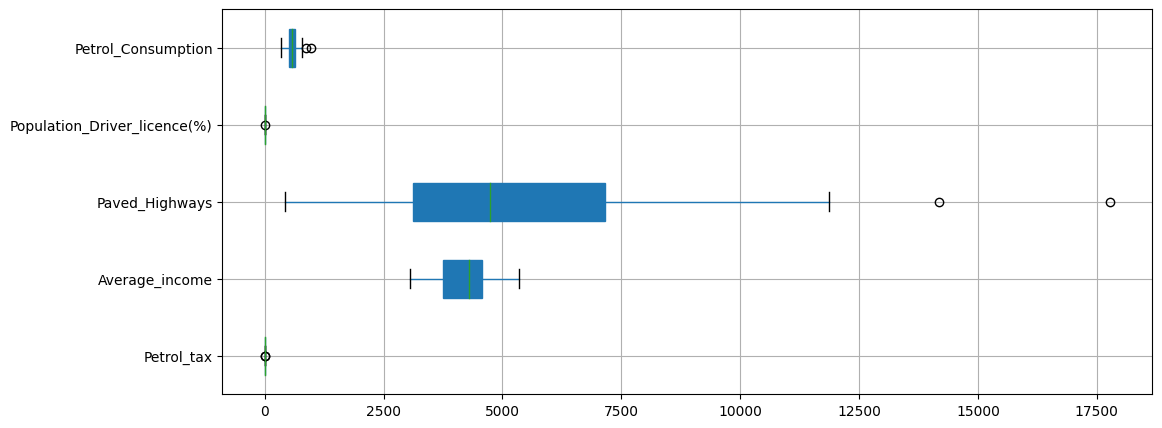

In [9]:
##Grafica ruido en los datos
plt.figure(figsize=(12,5))
gasolina.boxplot(patch_artist=True, vert=False)

In [15]:
###Correlaciones
correlacionGas = gasolina.corr().T
correlacionGas

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.0000,0.0127,-0.5221,-0.2880,-0.4513
Average_income,0.0127,1.0000,0.0502,0.1571,-0.2449
Paved_Highways,-0.5221,0.0502,1.0000,-0.0641,0.0190
Population_Driver_licence(%),-0.2880,0.1571,-0.0641,1.0000,0.6990
Petrol_Consumption,-0.4513,-0.2449,0.0190,0.6990,1.0000


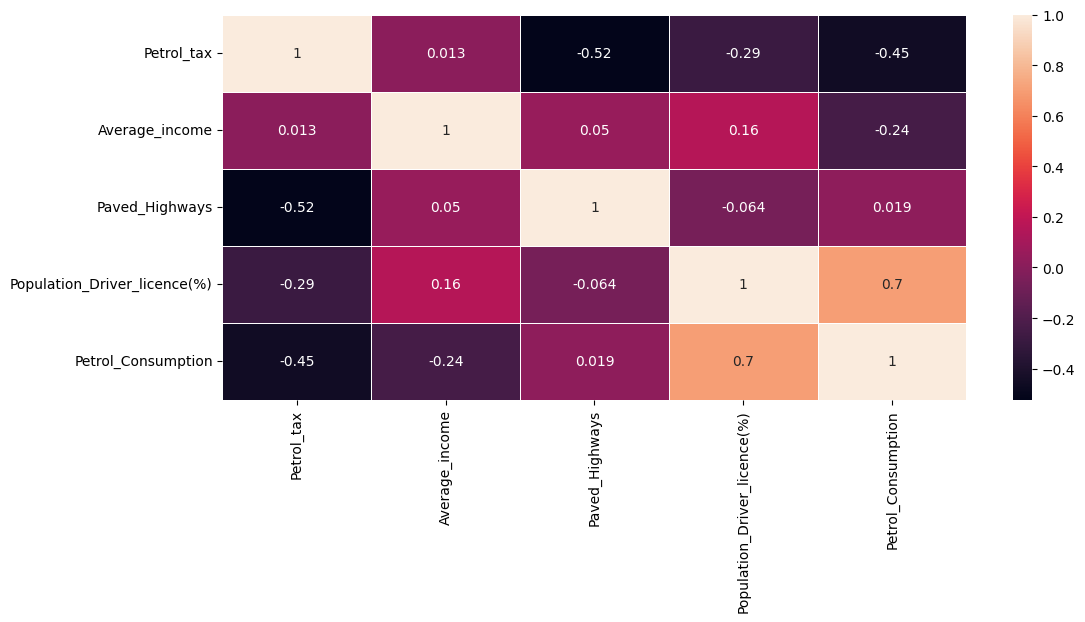

In [17]:
plt.figure(figsize=(12,5))
sns.heatmap(correlacionGas, linewidth=0.5, annot=True)
plt.show()

El coeficiente de correlación de pearson es: 0.7 Con un valor de P de: 3e-08


(0.0, 999.2)

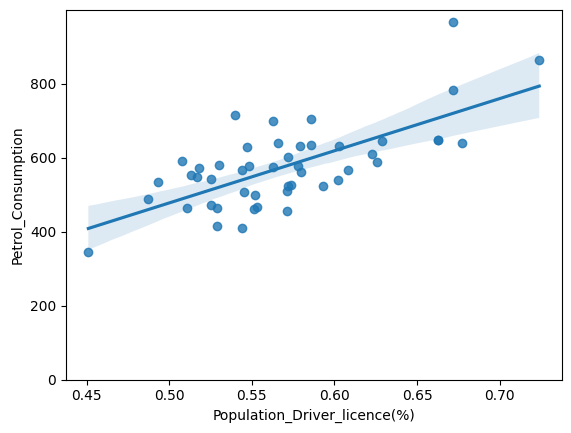

In [27]:
###grafica de visualización regresión
pearson_coef, p_value = stats.pearsonr(gasolina['Population_Driver_licence(%)'], gasolina['Petrol_Consumption'])
print("El coeficiente de correlación de pearson es:", round(pearson_coef,2), "Con un valor de P de:", round(p_value,8))

sns.regplot(x='Population_Driver_licence(%)', y='Petrol_Consumption', data=gasolina)
plt.ylim(0,)

<Axes: xlabel='Petrol_Consumption', ylabel='Density'>

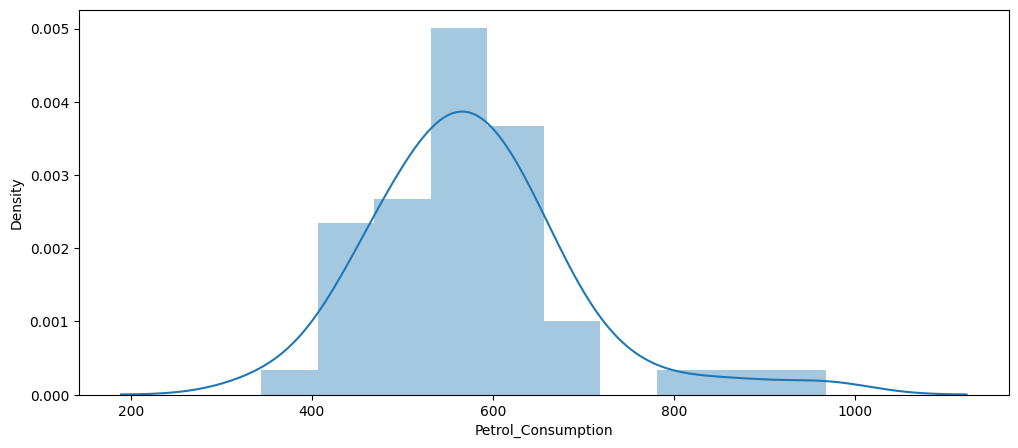

In [28]:
### Densidad e histograma sobre la variable y = petrol_consumption
plt.figure(figsize=(12,5))
sns.distplot(gasolina['Petrol_Consumption'])

#### Modelo y partición

In [128]:
X =gasolina.drop(['Petrol_Consumption'], axis=1)
y =gasolina['Petrol_Consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

arbolUno = DecisionTreeRegressor(max_depth=4, max_features=4)

arbolUno.fit(X_train, y_train)

predicciones = arbolUno.predict(X_test)

df = pd.DataFrame({'Actual':y_test, 'Predecido':predicciones})

df.head()

,Actual,Predecido
27,631,586.8000
40,587,663.7500
26,577,543.5000
43,591,663.7500
24,460,543.5000


In [129]:
###Métricas
print('Eficiencia R2 Score:', round(metrics.r2_score(y_test, predicciones),3)*100)
print('Error mediatico cuadrático RMSE', np.sqrt(metrics.mean_squared_error(y_test, predicciones)))
print('Error Absoluto:',metrics.mean_absolute_error(y_test, predicciones))

Eficiencia R2 Score: 56.10000000000001
Error mediatico cuadrático RMSE 96.03245043753198
Error Absoluto: 84.78777777777778


In [130]:
###best Features  - mejores caracteristicas
varI = arbolUno.feature_importances_
varImpor = pd.DataFrame(pd.Series(varI, index=X.columns).sort_values(ascending=False))
varImpor

,0
Population_Driver_licence(%),0.6386
Average_income,0.2020
Petrol_tax,0.0847
Paved_Highways,0.0747


In [131]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(arbolUno, filled=True, rounded=True, feature_names=X.columns, out_file=None)

import graphviz

graphviz.Source(dot_data)

arbol = graphviz.Source(dot_data)

arbol.save('arbol.jpg')

arbol.render(filename='arbol',view = True, format='jpg')

'arbol.jpg'

#### Validación cruzada con GridSearch y Cross Validation

In [132]:
###Librería GridSearch CV
from sklearn.model_selection import GridSearchCV

##Crear la lista de parámetros
param_grid = [{"max_depth":[3,4,5,None], "max_features":[3,4,5,6,7], "random_state":[42,62, 82, 123]}]

###Activador de los parámetros
gs = GridSearchCV(estimator=DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv=10)

In [133]:
###Activamos entrenamiento con GridSearch y los parámetros definidos
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0),
             param_grid=[{'max_depth': [3, 4, 5, None],
                          'max_features': [3, 4, 5, 6, 7],
                          'random_state': [42, 62, 82, 123]}])

In [134]:
###Ver iteraciones y función de los parámetros
gs.cv_results_['params']

[{'max_depth': 3, 'max_features': 3, 'random_state': 42},
 {'max_depth': 3, 'max_features': 3, 'random_state': 62},
 {'max_depth': 3, 'max_features': 3, 'random_state': 82},
 {'max_depth': 3, 'max_features': 3, 'random_state': 123},
 {'max_depth': 3, 'max_features': 4, 'random_state': 42},
 {'max_depth': 3, 'max_features': 4, 'random_state': 62},
 {'max_depth': 3, 'max_features': 4, 'random_state': 82},
 {'max_depth': 3, 'max_features': 4, 'random_state': 123},
 {'max_depth': 3, 'max_features': 5, 'random_state': 42},
 {'max_depth': 3, 'max_features': 5, 'random_state': 62},
 {'max_depth': 3, 'max_features': 5, 'random_state': 82},
 {'max_depth': 3, 'max_features': 5, 'random_state': 123},
 {'max_depth': 3, 'max_features': 6, 'random_state': 42},
 {'max_depth': 3, 'max_features': 6, 'random_state': 62},
 {'max_depth': 3, 'max_features': 6, 'random_state': 82},
 {'max_depth': 3, 'max_features': 6, 'random_state': 123},
 {'max_depth': 3, 'max_features': 7, 'random_state': 42},
 {'max_dep

In [135]:
##Ranking de test score
gs.cv_results_['rank_test_score']

array([44, 20, 19, 22,  7,  7,  3,  7,  7,  7,  3,  7,  7,  7,  3,  7,  7,
        7,  3,  7, 54, 23, 27, 21, 36, 28, 28, 40, 36, 28, 28, 40, 36, 28,
       28, 40, 36, 28, 28, 40, 80,  1, 63, 25, 76, 72, 46, 68, 76, 72, 46,
       68, 76, 72, 46, 68, 76, 72, 46, 68, 45,  2, 24, 26, 50, 59, 64, 55,
       50, 59, 64, 55, 50, 59, 64, 55, 50, 59, 64, 55])

In [136]:
##Revisar estimador final
gs.best_estimator_

DecisionTreeRegressor(max_depth=5, max_features=3, random_state=62)

In [137]:
###Crear modelo parametrizado y con tuning
arbolDos = DecisionTreeRegressor(max_depth=5, max_features=3, random_state=62)

arbolDos.fit(X_train, y_train)

prediccionesDos = arbolDos.predict(X_test)

dfDos = pd.DataFrame({'ActualDos':y_test, 'PredecidoDos':prediccionesDos})

dfDos.head()

,ActualDos,PredecidoDos
27,631,575.5000
40,587,632.0000
26,577,575.5000
43,591,714.0000
24,460,510.0000


In [138]:
###Métricas
print('Eficiencia R2 Score Modelo Dos:', round(metrics.r2_score(y_test, prediccionesDos),3)*100)
print('Error mediatico cuadrático RMSE Modelo Dos', np.sqrt(metrics.mean_squared_error(y_test, prediccionesDos)))
print('Error Absoluto Modelo Dos:',metrics.mean_absolute_error(y_test, prediccionesDos))

Eficiencia R2 Score Modelo Dos: 72.5
Error mediatico cuadrático RMSE Modelo Dos 75.97598012237523
Error Absoluto Modelo Dos: 62.228888888888875


In [104]:
###Mostrar el arbol de regresión
dot_dataDos = export_graphviz(arbolDos, filled=True, rounded=True, feature_names=X.columns, out_file=None)

arbolDos = graphviz.Source(dot_dataDos)

arbolDos.save('arbolDos.jpg')

arbolDos.render(filename='arbolDos',view = True, format='jpg')

'arbolDos.jpg'

In [105]:
###Dataframe antes y despues
DT_regresion = [['Max_depth', 4,5], ['Max_features', 4,3], 
                ['R2', 0.56, 0.72],['RMSE', 96.03, 75.97],
                ['Error Absoluto',84.78,62.22]]
resumen = pd.DataFrame(DT_regresion, columns=['Parametros','Sin GridSearch','Con GridSearch'])

resumen

,Parametros,Sin GridSearch,Con GridSearch
0,Max_depth,4.0000,5.0000
1,Max_features,4.0000,3.0000
2,R2,0.5600,0.7200
3,RMSE,96.0300,75.9700
4,Error Absoluto,84.7800,62.2200


### Variación del modelo %driver vs petrol consumption

In [155]:
X =gasolina['Population_Driver_licence(%)'].values
y =gasolina['Petrol_Consumption'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

arbolTres = DecisionTreeRegressor(max_depth=4, max_features=4)

arbolTres.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

prediccionesTres = arbolTres.predict(X_test.reshape(-1,1))

dfTres = pd.DataFrame({'Actual':y_test.reshape(-1), 'Predecido':prediccionesTres.reshape(-1)})

dfTres.head()

,Actual,Predecido
0,631,570.3333
1,587,588.0000
2,577,545.1000
3,591,464.0000
4,460,545.1000


In [156]:
###Métricas
print('Eficiencia R2 Score Modelo Tres:', round(metrics.r2_score(y_test, prediccionesTres),3)*100)
print('Error mediatico cuadrático RMSE Modelo Tres', np.sqrt(metrics.mean_squared_error(y_test, prediccionesTres)))
print('Error Absoluto Modelo Tres:',metrics.mean_absolute_error(y_test, prediccionesTres))

Eficiencia R2 Score Modelo Dos: 43.0
Error mediatico cuadrático RMSE Modelo Dos 109.48359187060356
Error Absoluto Modelo Dos: 95.35111111111112


In [160]:
###Activamos entrenamiento con GridSearch y los parámetros definidos
gs.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0),
             param_grid=[{'max_depth': [3, 4, 5, None],
                          'max_features': [3, 4, 5, 6, 7],
                          'random_state': [42, 62, 82, 123]}])

In [161]:
gs.best_estimator_

DecisionTreeRegressor(max_features=3, random_state=42)

In [162]:
##Arbol cuatro con parametrización de uno a uno
arbolCuatro = DecisionTreeRegressor(max_features=3, random_state=42)

arbolCuatro.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

prediccionesCuatro = arbolCuatro.predict(X_test.reshape(-1,1))

dfCuatro = pd.DataFrame({'ActualDos':y_test.reshape(-1), 'PredecidoDos':prediccionesCuatro.reshape(-1)})

dfCuatro.head()

,ActualDos,PredecidoDos
0,631,577.0000
1,587,610.0000
2,577,508.0000
3,591,464.0000
4,460,498.0000


In [163]:
###Métricas
print('Eficiencia R2 Score Modelo Cuatro:', round(metrics.r2_score(y_test, prediccionesCuatro),3)*100)
print('Error mediatico cuadrático RMSE Modelo Cuatro', np.sqrt(metrics.mean_squared_error(y_test, prediccionesCuatro)))
print('Error Absoluto Modelo Cuatro:',metrics.mean_absolute_error(y_test, prediccionesCuatro))

Eficiencia R2 Score Modelo Cuatro: 44.3
Error mediatico cuadrático RMSE Modelo Cuatro 108.20081638632246
Error Absoluto Modelo Cuatro: 96.5
